In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib.ticker as ticker

In [4]:
file_path = "./Checkpoints/Ablations_10K/Generations_sas_3_selfies/Sampling_results_sas_3_selfies_10K.xlsx"

df = pd.read_excel(file_path)
df

,Model,Non Valid Smiles,Canonical Smiles Unique,In_Subset Unique,In_GDB13 Unique,In_GDB13 & Subset Unique,Train Recall Unique,Generated Smiles count
0,OPT_iter_1000_temp_1_10K,0,9145,736,2207,198,20,10000
1,OPT_iter_10000_temp_1_10K,0,9996,4706,6731,3421,397,10000
2,OPT_iter_10000_temp_0.45_10K,0,9468,6885,8092,6003,708,10000
3,OPT_iter_10000_temp_0.4_10K,0,8870,6517,7576,5659,667,10000
4,OPT_iter_10000_temp_0.55_10K,0,9870,6852,8293,5838,705,10000
5,OPT_iter_10000_temp_0.5_10K,0,9755,6862,8241,5905,771,10000
6,OPT_iter_10000_temp_0.65_10K,0,9970,6554,8187,5490,666,10000
7,OPT_iter_10000_temp_0.6_10K,0,9939,6777,8283,5733,696,10000
8,OPT_iter_10000_temp_0.75_10K,0,9975,6144,7831,4951,612,10000
9,OPT_iter_10000_temp_0.7_10K,0,9969,6335,8002,5213,632,10000


In [63]:
temp_df = df[:14]
topp_df = df[14:]

In [64]:
def extract_sampling_value(file_name, start_str, end_str):
    start_idx = file_name.index(start_str) + len(start_str)
    end_idx =  file_name.index(end_str)
    
    value = file_name[start_idx: end_idx]
    
    return value

In [65]:
temp_df['sample_type'] = temp_df['Model'].apply(lambda x: "aa" in x)
topp_df['sample_type'] = topp_df['Model'].apply(lambda x: "aa" in x)

/tmp/ipykernel_2419506/3018650135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['sample_type'] = temp_df['Model'].apply(lambda x: "aa" in x)
/tmp/ipykernel_2419506/3018650135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topp_df['sample_type'] = topp_df['Model'].apply(lambda x: "aa" in x)


In [66]:
temp_df['sample_val'] = temp_df['Model'].apply(lambda x: extract_sampling_value(x, "temp_", "_10K"))
topp_df['sample_val'] = topp_df['Model'].apply(lambda x: extract_sampling_value(x, "topp_", "_10K"))

/tmp/ipykernel_2419506/2504942995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['sample_val'] = temp_df['Model'].apply(lambda x: extract_sampling_value(x, "temp_", "_10K"))
/tmp/ipykernel_2419506/2504942995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topp_df['sample_val'] = topp_df['Model'].apply(lambda x: extract_sampling_value(x, "topp_", "_10K"))


In [67]:
temp_df

,Model,Non Valid Smiles,Canonical Smiles Unique,In_Subset Unique,In_GDB13 Unique,In_GDB13 & Subset Unique,Train Recall Unique,Generated Smiles count,sample_type,sample_val
0,OPT_iter_190000_temp_0.4_10K,0,8328,7902,8033,7641,1194,10000,False,0.4
1,OPT_iter_190000_temp_0.4_10K_aa,0,8368,7929,8069,7650,1198,10000,True,0.4
2,OPT_iter_190000_temp_0.5_10K,0,9603,8921,9182,8556,1377,10000,False,0.5
3,OPT_iter_190000_temp_0.5_10K_aa,0,9652,8945,9206,8564,1373,10000,True,0.5
4,OPT_iter_190000_temp_0.6_10K,0,9900,8898,9306,8414,1333,10000,False,0.6
5,OPT_iter_190000_temp_0.6_10K_aa,0,9911,8858,9314,8411,1318,10000,True,0.6
6,OPT_iter_190000_temp_0.7_10K,0,9977,8517,9193,7943,1236,10000,False,0.7
7,OPT_iter_190000_temp_0.7_10K_aa,0,9973,8479,9155,7934,1257,10000,True,0.7
8,OPT_iter_190000_temp_0.8_10K,0,9987,8030,8955,7370,1136,10000,False,0.8
9,OPT_iter_190000_temp_0.8_10K_aa,0,9987,7918,8874,7278,1095,10000,True,0.8


In [68]:
temp_df_aa = temp_df[temp_df["sample_type"]==True]
temp_df_our = temp_df[temp_df["sample_type"]==False]

topp_df_aa = topp_df[topp_df["sample_type"]==True]
topp_df_our = topp_df[topp_df["sample_type"]==False]

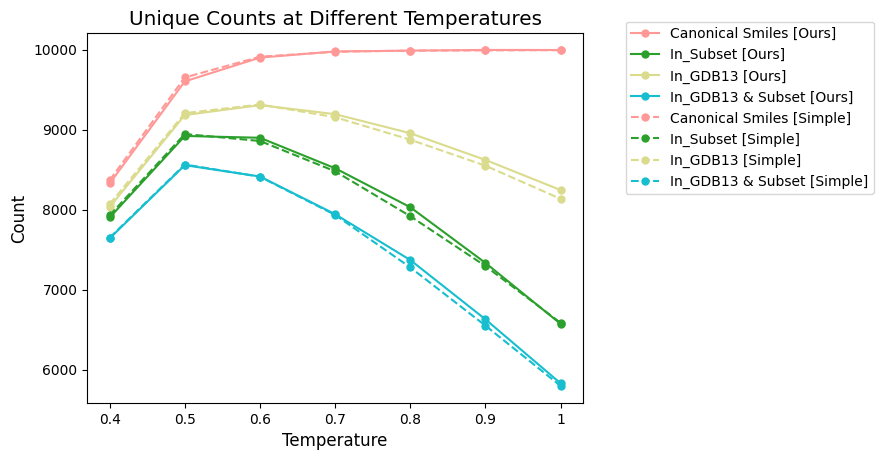

In [70]:
plt.plot(temp_df_our["sample_val"], temp_df_our["Canonical Smiles Unique"], label="Canonical Smiles [Ours]", marker="o", markersize=5, c="#ff9896")
plt.plot(temp_df_our["sample_val"], temp_df_our["In_Subset Unique"], label="In_Subset [Ours]", marker="o", markersize=5, c="#2ca02c")
plt.plot(temp_df_our["sample_val"], temp_df_our["In_GDB13 Unique"], label="In_GDB13 [Ours]", marker="o", markersize=5, c="#dbdb8d")
plt.plot(temp_df_our["sample_val"], temp_df_our["In_GDB13 & Subset Unique"], label="In_GDB13 & Subset [Ours]", marker="o", markersize=5, c="#17becf")

plt.plot(temp_df_aa["sample_val"], temp_df_aa["Canonical Smiles Unique"], label="Canonical Smiles [Simple]", marker="o", markersize=5, linestyle='dashed', c="#ff9896")
plt.plot(temp_df_aa["sample_val"], temp_df_aa["In_Subset Unique"], label="In_Subset [Simple]", marker="o", markersize=5, linestyle='dashed', c="#2ca02c")
plt.plot(temp_df_aa["sample_val"], temp_df_aa["In_GDB13 Unique"], label="In_GDB13 [Simple]", marker="o", markersize=5, linestyle='dashed', c="#dbdb8d")
plt.plot(temp_df_aa["sample_val"], temp_df_aa["In_GDB13 & Subset Unique"], label="In_GDB13 & Subset [Simple]", marker="o", markersize=5, linestyle='dashed', c="#17becf")

plt.title('Unique Counts at Different Temperatures', fontsize='x-large')
plt.xlabel('Temperature', fontsize='large')
plt.ylabel('Count', fontsize='large')

plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.05));

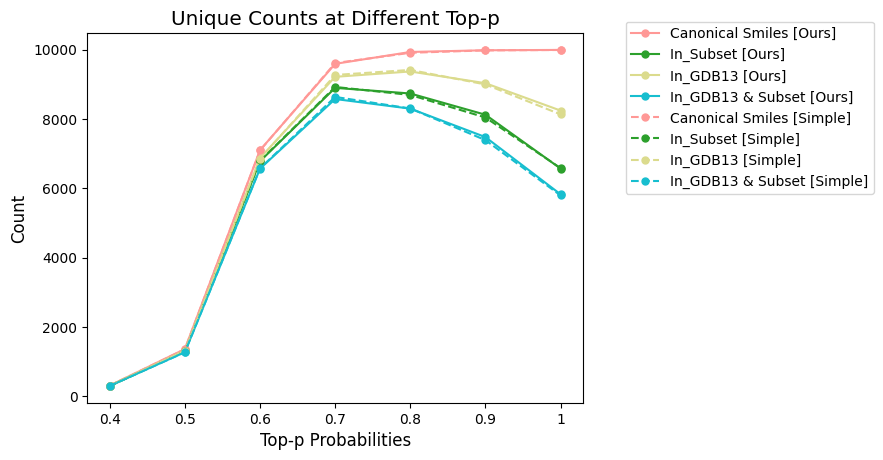

In [71]:
plt.plot(topp_df_our["sample_val"], topp_df_our["Canonical Smiles Unique"], label="Canonical Smiles [Ours]", marker="o", markersize=5, c="#ff9896")
plt.plot(topp_df_our["sample_val"], topp_df_our["In_Subset Unique"], label="In_Subset [Ours]", marker="o", markersize=5, c="#2ca02c")
plt.plot(topp_df_our["sample_val"], topp_df_our["In_GDB13 Unique"], label="In_GDB13 [Ours]", marker="o", markersize=5, c="#dbdb8d")
plt.plot(topp_df_our["sample_val"], topp_df_our["In_GDB13 & Subset Unique"], label="In_GDB13 & Subset [Ours]", marker="o", markersize=5, c="#17becf")

plt.plot(topp_df_aa["sample_val"], topp_df_aa["Canonical Smiles Unique"], label="Canonical Smiles [Simple]", marker="o", markersize=5, linestyle='dashed', c="#ff9896")
plt.plot(topp_df_aa["sample_val"], topp_df_aa["In_Subset Unique"], label="In_Subset [Simple]", marker="o", markersize=5, linestyle='dashed', c="#2ca02c")
plt.plot(topp_df_aa["sample_val"], topp_df_aa["In_GDB13 Unique"], label="In_GDB13 [Simple]", marker="o", markersize=5, linestyle='dashed', c="#dbdb8d")
plt.plot(topp_df_aa["sample_val"], topp_df_aa["In_GDB13 & Subset Unique"], label="In_GDB13 & Subset [Simple]", marker="o", markersize=5, linestyle='dashed', c="#17becf")

plt.title('Unique Counts at Different Top-p', fontsize='x-large')
plt.xlabel('Top-p Probabilities', fontsize='large')
plt.ylabel('Count', fontsize='large')

plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.05));